In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method

import scipy.special as sf
%matplotlib notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10583 entries, 0 to 10582
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10583 non-null  int64  
 1   Event   10583 non-null  int64  
 2   pt1     10583 non-null  float64
 3   eta1    10583 non-null  float64
 4   phi1    10583 non-null  float64
 5   Q1      10583 non-null  int64  
 6   dxy1    10583 non-null  float64
 7   iso1    10583 non-null  float64
 8   pt2     10583 non-null  float64
 9   eta2    10583 non-null  float64
 10  phi2    10583 non-null  float64
 11  Q2      10583 non-null  int64  
 12  dxy2    10583 non-null  float64
 13  iso2    10583 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>


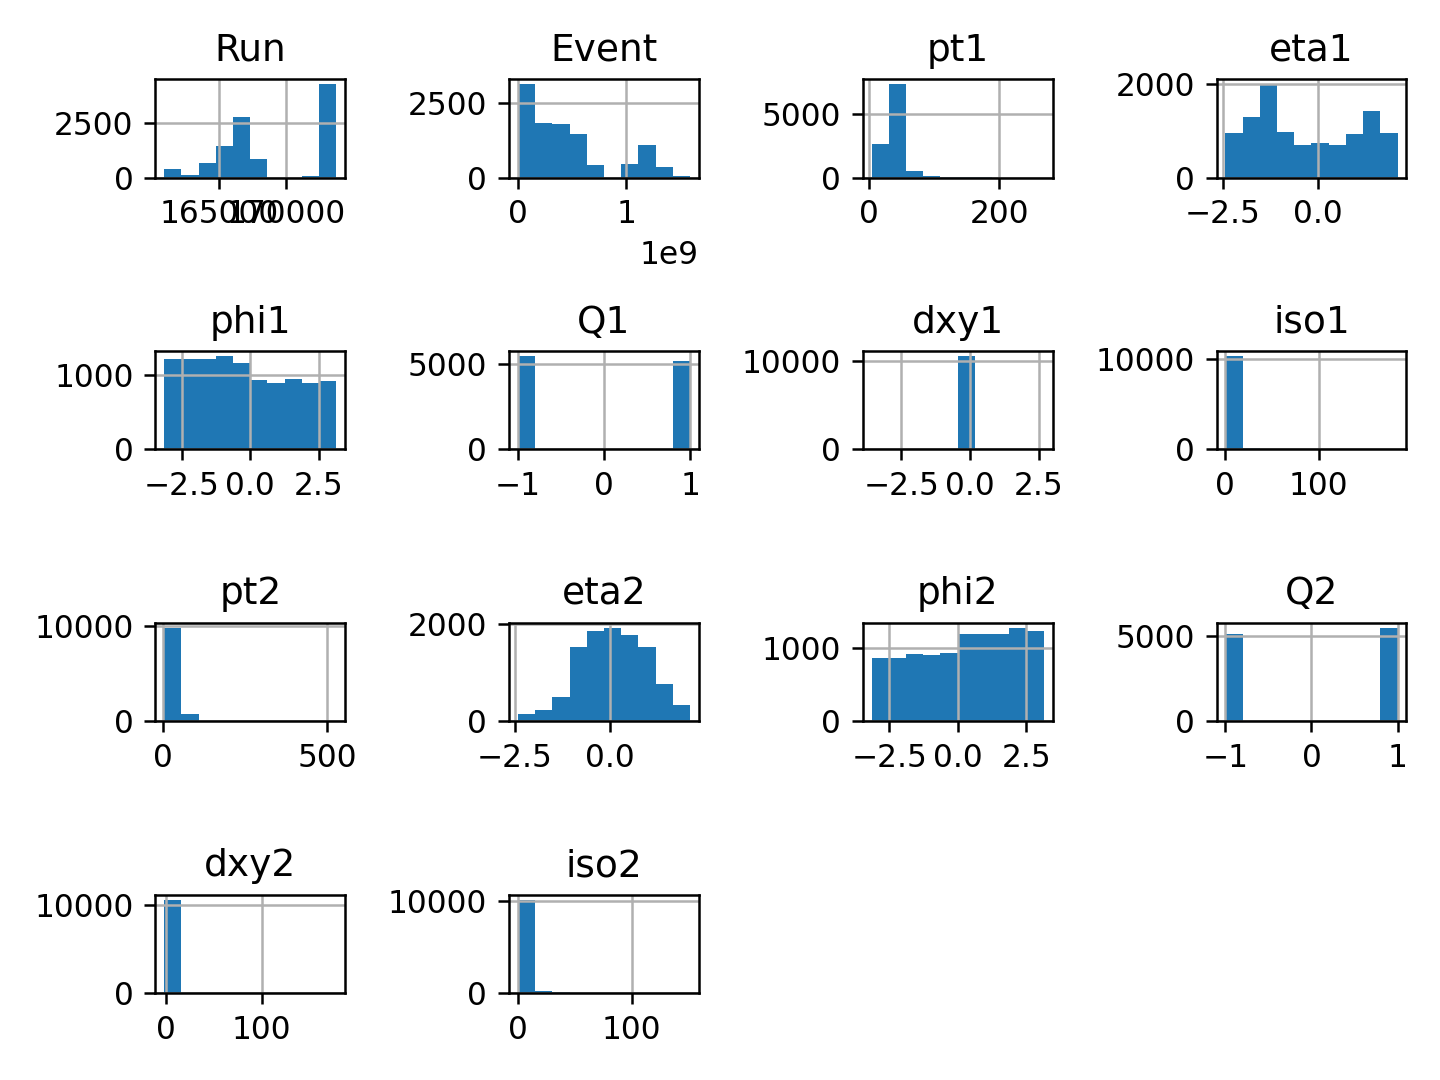

In [2]:
#Read the data and save it into a DataFrame object
df = pd.read_csv('Data/Zmumu_Run2011A.csv')
df.info()
df.hist()
plt.tight_layout();

In [3]:
#Create the Invariant Mass
mInv = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1 - df.eta2) - np.cos(df.phi1-df.phi2)))
df['M'] = mInv
df.head(3)

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,M
0,165617,74969122,54.7055,-0.432396,2.57421,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214,89.885744
1,165617,75138253,24.5872,-2.052200,2.86657,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000,88.810987
2,165617,75887636,31.7386,-2.259450,-1.33229,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000,88.472502


<IPython.core.display.Javascript object>


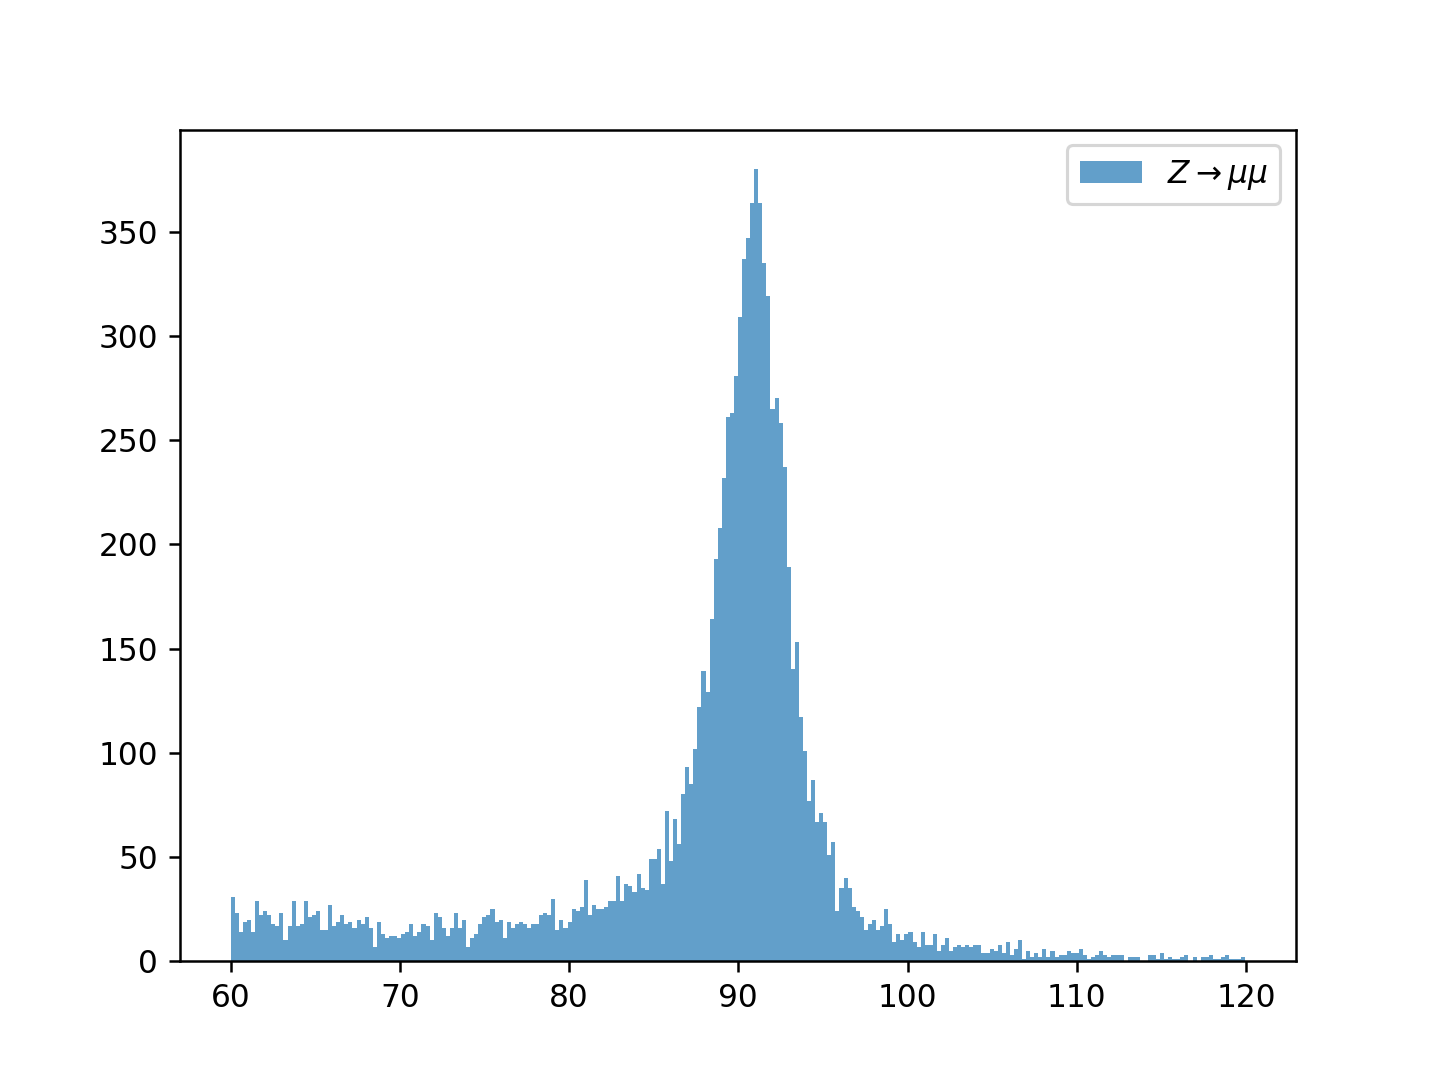

In [4]:
#Plot the Invariant Mass Distribution
fig = plt.figure("Z Decay")
plt.hist(mInv, bins = 250, alpha = 0.7, label = r'$Z\rightarrow \mu\mu$')
plt.legend();

In [25]:
#Define a fit function
#We will use the Relativistic Breit-Wigner Distribution
def BreitWignerDist(M, gamma, M_z, a, b, c):
    littleGamma = np.sqrt( (M_z**2) * (M_z**2 + gamma**2) )
    k = ( 2.0 * np.sqrt(2.0) * M_z * gamma * littleGamma ) / ( np.pi * np.sqrt(M_z**2 + littleGamma) )
    f = k / ( (M**2 - M_z**2)**2 + (M_z**2) * (gamma**2) )
    return a*M + b + c*f

<IPython.core.display.Javascript object>


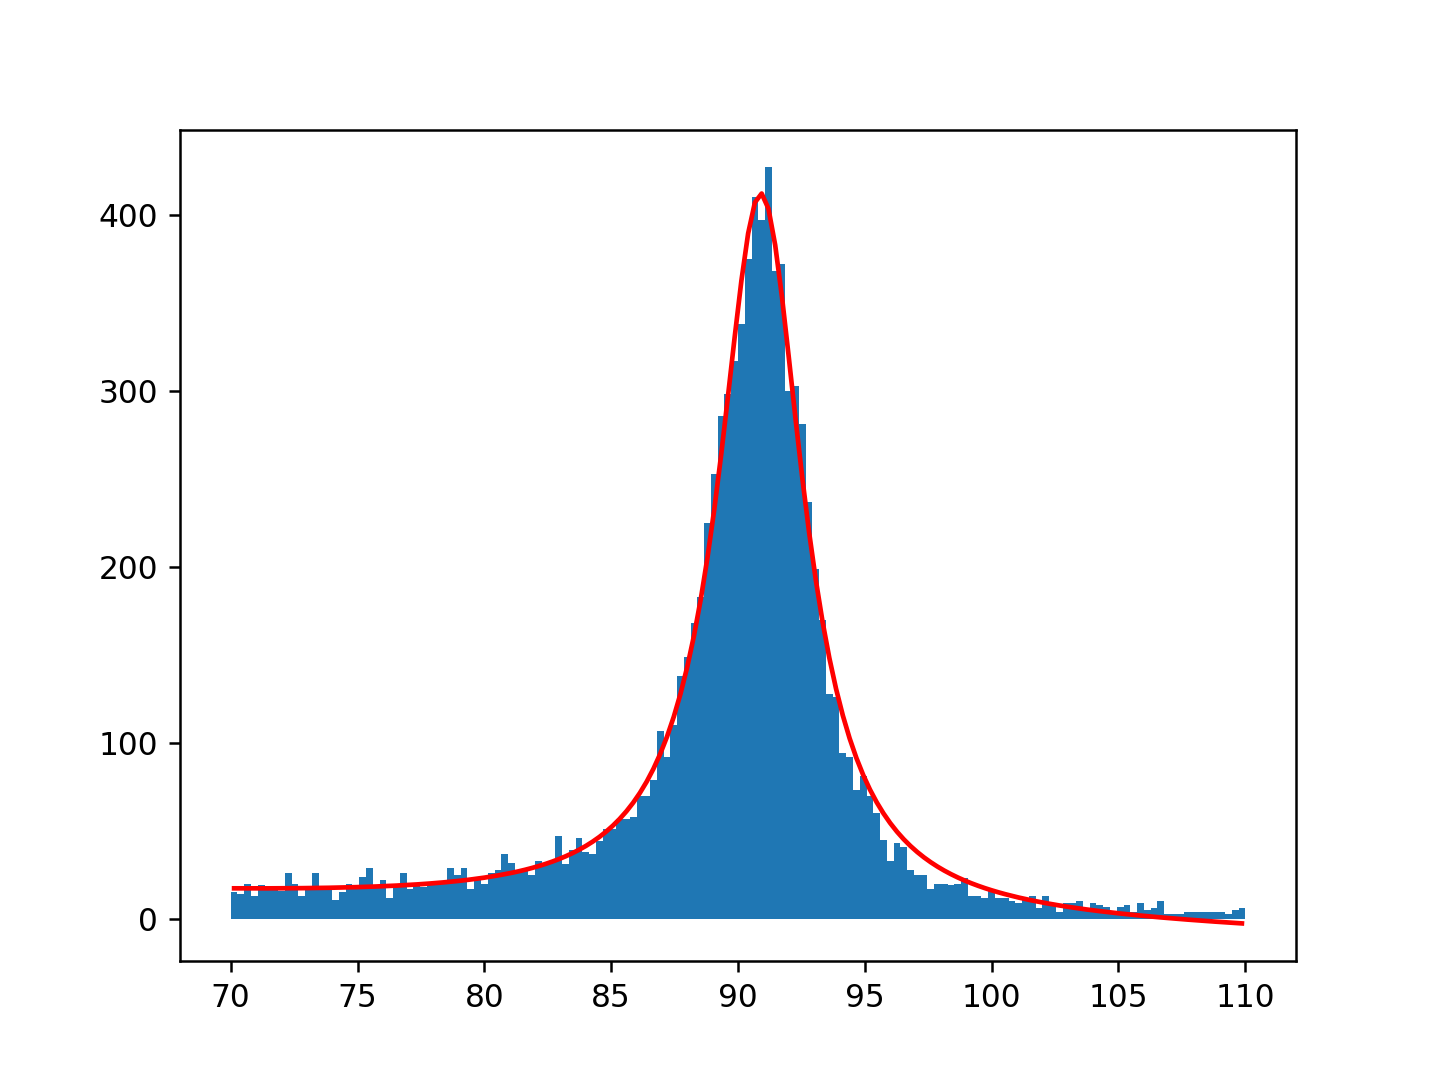

In [26]:
#Setting a limit 
lowerLimit = 70.0
upperLimit = 110.0
bins = 150

#Grab Histogram Vallue
fig = plt.figure()
histogramMu = plt.hist(mInv, bins = bins, range=(lowerLimit, upperLimit));
#print(histogramMu[1][0:])

yMu = histogramMu[0]
xMu = 0.5*(histogramMu[1][0:-1] + histogramMu[1][1:])
yMuError = np.sqrt(yMu)

In [27]:
#Creating a Fit
initials = [2.5, 91, -2, 200, 13000]
bestMu, coverianceMu = curve_fit(BreitWignerDist, xMu, yMu, p0=initials, absolute_sigma=True)
print(bestMu)

plt.plot(xMu, BreitWignerDist(xMu, *bestMu),'r-')

[ 4.09922788e+00  9.09013151e+01 -4.73031339e-01  4.55070749e+01
  2.63642711e+03]


In [29]:
#Assess the Fit
chisq = np.sum( (yMu - BreitWignerDist(xMu, *bestMu))**2 / (yMuError)**2 )
dof = len(yMu) - len(bestMu)
print('reduced chi2: ', chisq/dof)

pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('pvalue: ', pvalue)

reduced chi2:  1.957946783115645
pvalue:  4.678587258134474e-11


<IPython.core.display.Javascript object>


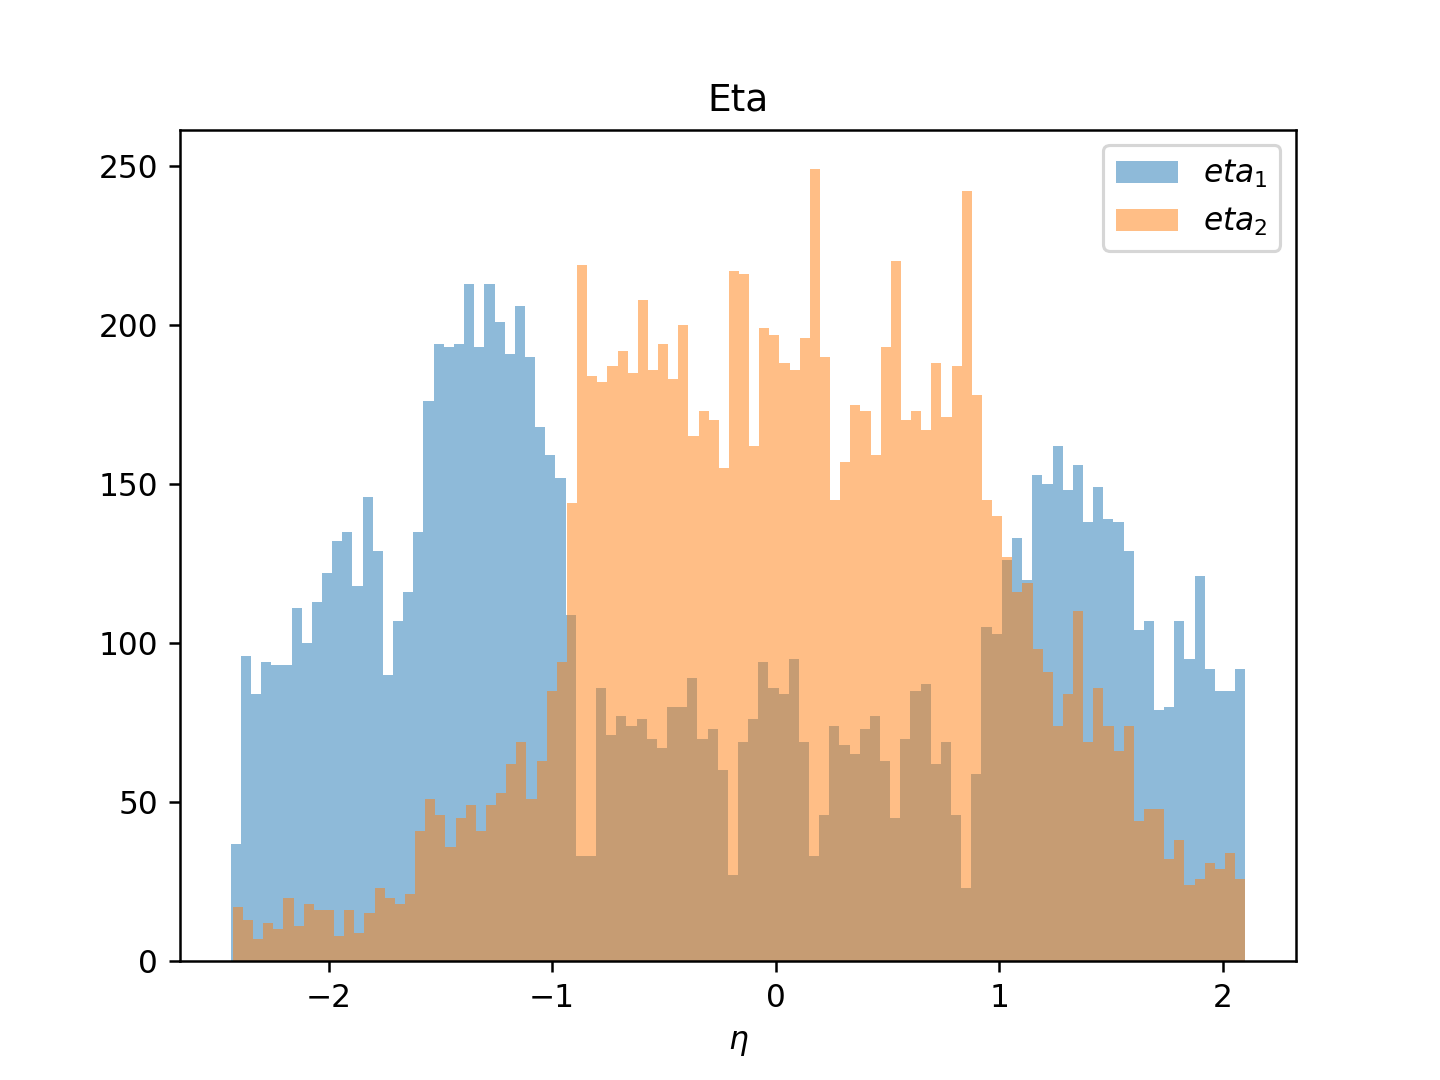

In [31]:
#Comparing Distribution on the same graph
fig = plt.figure('eta')
plt.hist(df.eta1, bins = 100, alpha = 0.5, label = r'$eta_1$')
plt.hist(df.eta2, bins = 100, alpha = 0.5, label = r'$eta_2$')

plt.xlabel(r'$\eta$')
plt.title("Eta")
plt.legend();